Neural Network Homework

Week 6

Here, I get my data.

In [ ]:
import numpy as np
from tensorflow import keras as kr
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt

(X, Y), (X_test, Y_test) = kr.datasets.mnist.load_data()

# train-validation-test split
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y)
X_train = X_train.reshape((X_train.shape[0], 784)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 784)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 784)).astype('float32')

Y_train_hot = kr.utils.to_categorical(Y_train)
Y_val_hot = kr.utils.to_categorical(Y_val)
Y_test_hot = kr.utils.to_categorical(Y_test)

This is where I run my model. I use a single hidden layer with a ReLU activation. I found that a hidden layer with 64 nodes and a learning rate of 0.00025 produced the best results.

In [ ]:
NUM_FEATURES = len(X_train[0])
NUM_CLASSES = 10
HIDDEN_SIZE = 64
LEARNING_RATE = 0.00025
NUM_EPOCHS = 50

model = kr.models.Sequential()
model.add(kr.Input(shape=(NUM_FEATURES,)))
model.add(kr.layers.Dense(HIDDEN_SIZE, activation='relu'))
model.add(kr.layers.Dense(NUM_CLASSES, activation='softmax'))

nn_model.compile(optimizer=kr.optimizers.Adam(learning_rate=LEARNING_RATE), loss='binary_crossentropy',
                 metrics=[kr.metrics.BinaryAccuracy(), kr.metrics.Precision(), kr.metrics.Recall()])
nn_model.fit(nn_X_train, Y_train_hot, epochs=NUM_EPOCHS, validation_data=(nn_X_val, Y_val_hot))

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 6.1974 - categorical_accuracy: 0.7025 - val_loss: 1.1513 - val_categorical_accuracy: 0.7486
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8808 - categorical_accuracy: 0.8058 - val_loss: 0.7437 - val_categorical_accuracy: 0.8228
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6028 - categorical_accuracy: 0.8595 - val_loss: 0.5862 - val_categorical_accuracy: 0.8700
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4572 - categorical_accuracy: 0.8886 - val_loss: 0.4982 - val_categorical_accuracy: 0.8879
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3683 - categorical_accuracy: 0.9080 - val_loss: 0.4236 - val_categorical_accuracy: 0.9032
Epoch 6/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2980 - categorical_accuracy: 0.9230 - val_loss: 0.3995 - val_categorical_accuracy:

Here I plot my loss. I put it in a separate box from the test statistics so I could see where my model started overfitting without also checking the test data.

Interestingly, I found that even though my model has already started overfitting when it comes to loss, it isn't to the same extent when it comes to accuracy.

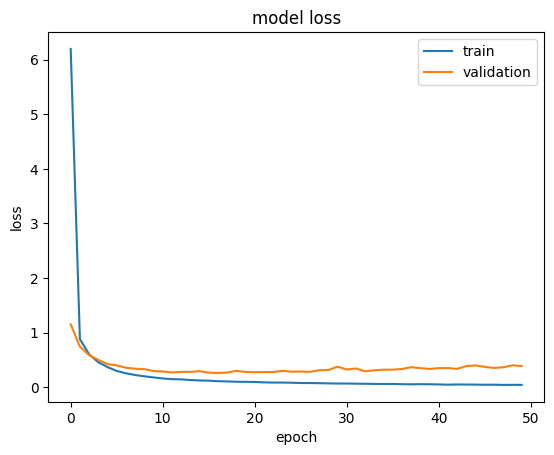

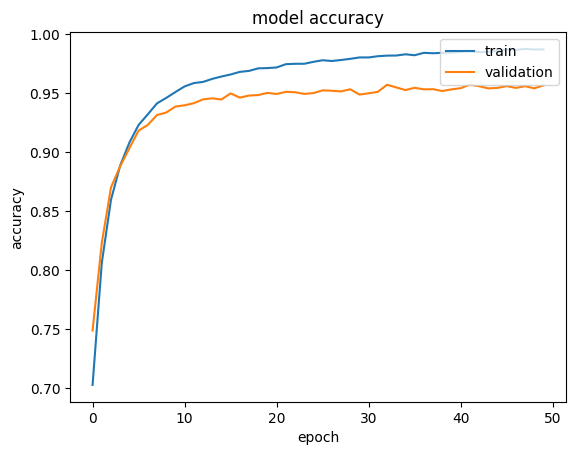

In [ ]:
# code for how history works borrowed from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Here you can see the test data's accuracy, precision, and recall.

313/313 [==============================] - 1s 2ms/step - loss: 0.4029 - categorical_accuracy: 0.9574


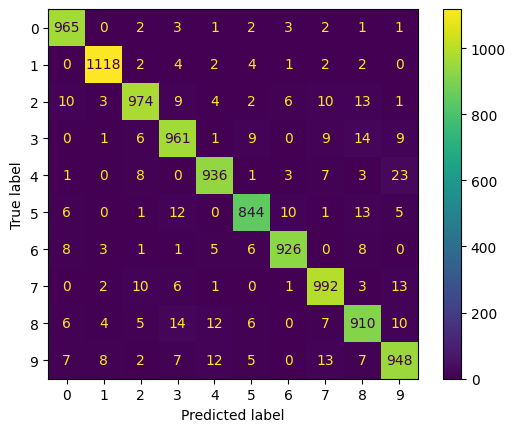

0: Precision is 0.962 and recall is 0.985
1: Precision is 0.982 and recall is 0.985
2: Precision is 0.963 and recall is 0.944
3: Precision is 0.945 and recall is 0.951
4: Precision is 0.961 and recall is 0.953
5: Precision is 0.960 and recall is 0.946
6: Precision is 0.975 and recall is 0.967
7: Precision is 0.951 and recall is 0.965
8: Precision is 0.934 and recall is 0.934
9: Precision is 0.939 and recall is 0.940


In [ ]:
# evaluating on test data
model.evaluate(X_test, Y_test_hot)

test_prediction = [np.argmax(point) for point in model.predict(X_test, verbose=0)]

metrics.ConfusionMatrixDisplay.from_predictions(Y_test, test_prediction)
plt.show()

confusion_matrix = metrics.confusion_matrix(Y_test, test_prediction)
for num in range(NUM_CLASSES):
        precision = confusion_matrix[num, num] / sum(confusion_matrix[:, num])
        recall = confusion_matrix[num, num] / sum(confusion_matrix[num, :])
        print("%d:" % num, "Precision is %.3f" % precision, "and recall is %.3f" % recall)